# Step 1 : Import Data từ bước transform

In [127]:
# %pip install matplotlib seaborn

In [128]:
#%%
import sys
import os
import pytest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add path để import etl.transform
import pathlib
notebook_dir = str(pathlib.Path().resolve())
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

from etl.transform import(extract_salary_range, normalize_job_title, split_city_district_dynamic)

from etl.extract import(extract)

In [129]:
# main.py
#%%
from etl.extract import extract
from etl.transform import transform_data

csv_path = r"C:\Users\cau.tran\OneDrive\2. Study\13. Data Engineering with Unigap\Action 1\DE-Unigap-Action-1\data/data.csv"
table_name = "it_salary"

print("🚀 ETL pipeline bắt đầu...")

# EXTRACT
df_raw = extract(csv_path)

# TRANSFORM
df_clean = transform_data(df_raw)

🚀 ETL pipeline bắt đầu...
📥 Đã trích xuất 1933 bản ghi từ C:\Users\cau.tran\OneDrive\2. Study\13. Data Engineering with Unigap\Action 1\DE-Unigap-Action-1\data/data.csv


In [130]:
df_clean.head()

,created_date,job_title,company,salary,address,time,link_description,min_salary,max_salary,unit_currency,city_1,district_1,city_2,district_2,city_3,district_3,city_4,district_4,job_group
0,2023-08-01,Business Analyst,Công ty TNHH Công nghệ số Adamo,10 - 20 triệu,Hà Nội,Còn 25 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/business-analyst...,10.0,20.0,VND,Hà Nội,None,None,None,None,None,None,None,Data
1,2023-08-01,Nhân Viên Lập Trình Phần Mềm - Thu Nhập Từ 10 ...,Công ty TNHH Đầu Tư Công Nghệ ST,10 - 20 triệu,Hồ Chí Minh,Còn 91 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/nhan-vien-lap-tr...,10.0,20.0,VND,Hồ Chí Minh,None,None,None,None,None,None,None,Software Engineer
2,2023-08-01,.Net Developer (N3) | T9160,Công ty TNHH CMC GLOBAL,Thoả thuận,Toàn Quốc,Còn 30 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/net-developer-n3...,None,None,Other,Toàn Quốc,None,None,None,None,None,None,None,Software Engineer
3,2023-08-01,"Project Manager (Tiếng Anh Giao Tiếp, Từ 1 Năm...",CÔNG TY CỔ PHẦN CÔNG NGHỆ SOTATEK,Tới 35 triệu,Hà Nội: Cầu Giấy,Còn 25 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/project-manager-...,None,35.0,VND,Hà Nội,Cầu Giấy,None,None,None,None,None,None,PM
4,2023-08-01,Devops/Sre - Chuyên Viên Quản Trị Hệ Thống/Aut...,Công ty Cổ phần Thời Trang Yody,Tới 50 triệu,Hà Nội: Thanh Xuân: Hải Dương: TP Hải Dương,Còn 30 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/devops-sre-chuye...,None,50.0,VND,Hà Nội,Thanh Xuân,None,None,None,None,None,None,DevOps


In [131]:
# df_clean.to_csv(r"C:\Users\cau.tran\OneDrive\2. Study\13. Data Engineering with Unigap\Action 1\DE-Unigap-Action-1\data\cleaned_data.csv", index=False, encoding='utf-8-sig')

In [ ]:
# df_clean[df_clean['job_group']=='Other'][['job_title','job_group']].to_csv(r"C:\Users\cau.tran\OneDrive\2. Study\13. Data Engineering with Unigap\Action 1\DE-Unigap-Action-1\data\other_job_group.csv", index=False, encoding='utf-8-sig')

# Step 2 : Phân tích

## Q1: Phân bổ mức lương theo vị trí

In [133]:
# Quy đổi cột min, max salary sang VND

usd_to_vnd = 24000  # Tỷ giá USD sang VND

df_clean_1 = df_clean.copy()

# Loại bỏ dòng không có thông tin lương
df_clean_1 = df_clean_1[df_clean_1['unit_currency'].isin(['VND', 'USD'])]

# Tạo cột min/max lương theo VND
df_clean_1['min_salary_mil_vnd'] = df_clean_1.apply(
    lambda row: (float(row['min_salary']) * usd_to_vnd / 1e6) if row['unit_currency'] == 'USD' and pd.notna(row['min_salary']) 
    else row['min_salary'], axis=1)

df_clean_1['max_salary_mil_vnd'] = df_clean_1.apply(
    lambda row: (float(row['max_salary']) * usd_to_vnd / 1e6) if row['unit_currency'] == 'USD' and pd.notna(row['max_salary']) 
    else row['max_salary'], axis=1)

df_clean_1[['job_title','job_group', 'min_salary','max_salary','unit_currency','min_salary_mil_vnd', 'max_salary_mil_vnd']]

,job_title,job_group,min_salary,max_salary,unit_currency,min_salary_mil_vnd,max_salary_mil_vnd
0,Business Analyst,Data,10.0,20.0,VND,10.0,20.0
1,Nhân Viên Lập Trình Phần Mềm - Thu Nhập Từ 10 ...,Software Engineer,10.0,20.0,VND,10.0,20.0
3,"Project Manager (Tiếng Anh Giao Tiếp, Từ 1 Năm...",PM,None,35.0,VND,NaN,35.0
4,Devops/Sre - Chuyên Viên Quản Trị Hệ Thống/Aut...,DevOps,None,50.0,VND,NaN,50.0
5,Angularjs (Từ 1.5 Năm Kinh Nghiệm),Other,12.0,18.0,VND,12.0,18.0
...,...,...,...,...,...,...,...
1925,Chuyên Viên Hạ Tầng CNTT - IT Infrastructure,Other,15.0,17.0,VND,15.0,17.0
1926,Lập Trình Viên C/C++,Software Engineer,10.0,35.0,VND,10.0,35.0
1927,"Nhân Viên Bảo Hành, Sửa Chữa Máy Tính - IT (CN...",Other,10.0,None,VND,10.0,NaN
1929,Thực Tập Sinh Kỹ Thuật Máy Tính - Phần Cứng - ...,Intern,3.0,None,VND,3.0,NaN


In [134]:
# Kiểm tra giá trị outlier của lương theo vị trí
df_clean_1[df_clean_1['job_group']=='IT Support'][['job_title','job_group', 'min_salary','max_salary','unit_currency','min_salary_mil_vnd', 'max_salary_mil_vnd']].sort_values(by='min_salary_mil_vnd', ascending=False).head(5)

,job_title,job_group,min_salary,max_salary,unit_currency,min_salary_mil_vnd,max_salary_mil_vnd
1184,Nhân Viên IT Helpdesk,IT Support,10000000.0,14000000.0,USD,240000.0,336000.0
1600,Trưởng Phòng Công Nghệ Thông Tin (Hệ Thống & I...,IT Support,30.0,40.0,VND,30.0,40.0
926,Technical Support Engineer,IT Support,900.0,1000.0,USD,21.6,24.0
1400,IT Support/ Helpdesk Lương Từ 20 Triệu ( Tiếng...,IT Support,18.0,None,VND,18.0,NaN
703,Nhân Viên IT (IT Helpdesk ),IT Support,14.0,None,VND,14.0,NaN


=> Có giá trị outliner của do lương của một vị trí IT Support

=> Sử dụng Meadian thay vì mean

In [135]:
# Kiểm tra data trước khi viz
salary_by_role_1 = df_clean_1[df_clean_1['salary'].str.lower() != "thoả thuận"]

salary_by_role_2 = salary_by_role_1.groupby('job_group')[['min_salary_mil_vnd', 'max_salary_mil_vnd']].median().round(0).reset_index()

salary_by_role_2

,job_group,min_salary_mil_vnd,max_salary_mil_vnd
0,Data,17.0,30.0
1,DevOps,14.0,30.0
2,IT Support,10.0,12.0
3,Intern,3.0,5.0
4,Other,10.0,25.0
5,PM,24.0,40.0
6,Software Engineer,15.0,30.0
7,Tester,13.0,25.0


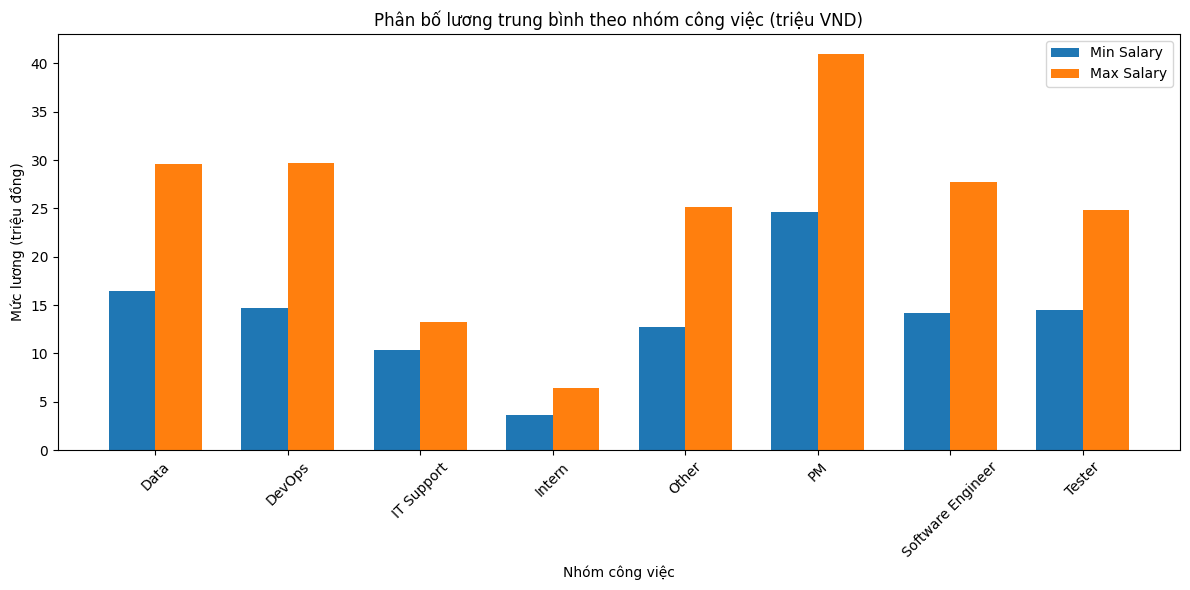

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu trung bình theo nhóm
salary_by_group = df_clean[df_clean['unit_currency'] == 'VND'].groupby('job_group').agg(
    min_salary_avg=('min_salary', 'mean'),
    max_salary_avg=('max_salary', 'mean')
).reset_index()

# Đổi đơn vị sang triệu
salary_by_group['min_salary_mil_vnd'] = salary_by_group['min_salary_avg']
salary_by_group['max_salary_mil_vnd'] = salary_by_group['max_salary_avg']

# Tạo chỉ số vị trí cột
x = np.arange(len(salary_by_group['job_group']))
width = 0.35

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, salary_by_group['min_salary_mil_vnd'], width=width, label='Min Salary')
plt.bar(x + width/2, salary_by_group['max_salary_mil_vnd'], width=width, label='Max Salary')

# Tùy chỉnh trục
plt.xticks(x, salary_by_group['job_group'], rotation=45)
plt.xlabel("Nhóm công việc")
plt.ylabel("Mức lương (triệu đồng)")
plt.title("Phân bố lương trung bình theo nhóm công việc (triệu VND)")
plt.legend()
plt.tight_layout()
plt.show()
